# XGBoost

Install with<p>
pip install xgboost


In [1]:
#!pip install xgboost pandas sklearn matplotlib numpy seaborn

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("futbol_fantasia.csv")
df.head()

,Equipo,moral_equipo,ult_5_partidos_ganados,ult_5_partidos_empate,goles_a_favor,goles_en_contra,prox_partido_local,prox_partido_gana
0,Equipo_A,9,3,0,3,1,1,1
1,Equipo_A,10,4,0,5,2,0,0
2,Equipo_A,7,4,0,5,3,1,0
3,Equipo_A,7,4,1,6,4,0,0
4,Equipo_A,7,4,1,7,5,1,1


In [4]:
df.dtypes

Equipo                    object
moral_equipo               int64
ult_5_partidos_ganados     int64
ult_5_partidos_empate      int64
goles_a_favor              int64
goles_en_contra            int64
prox_partido_local         int64
prox_partido_gana          int64
dtype: object

In [5]:
#Import Packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df['prox_partido_gana'].values

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0])

In [157]:
from sklearn.model_selection import train_test_split
X = df.drop(['Equipo','prox_partido_gana'],axis=1)
y = df['prox_partido_gana'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=26, stratify=y, random_state=431)

In [ ]:
import xgboost
model = xgboost.XGBClassifier(use_label_encoder=False)
model.fit(X_train,y_train)
# accuracy obtenido en Train
model.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.75      0.67      0.71         9

    accuracy                           0.81        26
   macro avg       0.79      0.77      0.78        26
weighted avg       0.80      0.81      0.80        26



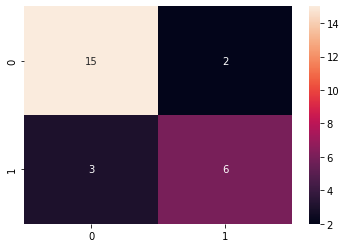

In [159]:
# accuracy en Test
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

#Classification Report
print(classification_report(y_test,y_pred))

## Importancia de características

Text(0.5, 1.0, 'Feature Importance')

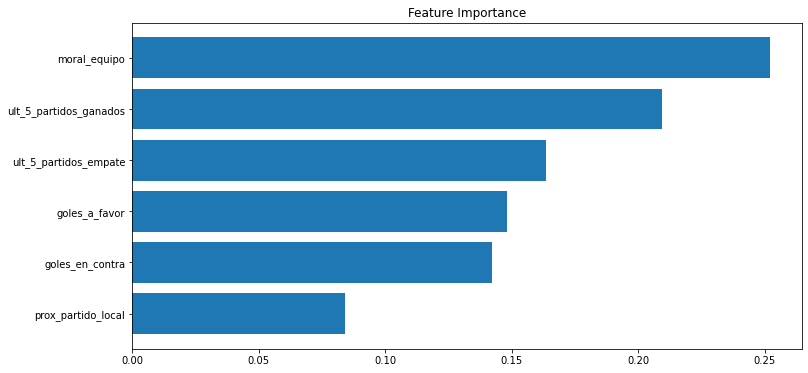

In [160]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [165]:
#!pip install graphviz


In [ ]:
# Si tienes instalado graphviz, puedes graficar su estructura interior
#import graphviz
#fig, ax = plt.subplots(figsize=(30, 30))
#xgboost.plot_tree(model, num_trees=4, ax=ax)
#plt.show()

# LightGBM

In [70]:
#!pip install lightgbm

In [71]:
import lightgbm as lgb

In [72]:
train_data = lgb.Dataset(X_train, label=y_train)

In [168]:
validation_data = lgb.Dataset(X_test, label=y_test)
param = {'max_depth': 4, 'objective': 'binary','verbose': -1}
#param['metric'] = 'auc'
num_round = 40
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data])

[1]	valid_0's binary_logloss: 0.634683
[2]	valid_0's binary_logloss: 0.625135
[3]	valid_0's binary_logloss: 0.617449
[4]	valid_0's binary_logloss: 0.609733
[5]	valid_0's binary_logloss: 0.603517
[6]	valid_0's binary_logloss: 0.597232
[7]	valid_0's binary_logloss: 0.592169
[8]	valid_0's binary_logloss: 0.587015
[9]	valid_0's binary_logloss: 0.582865
[10]	valid_0's binary_logloss: 0.578613
[11]	valid_0's binary_logloss: 0.575191
[12]	valid_0's binary_logloss: 0.571664
[13]	valid_0's binary_logloss: 0.568828
[14]	valid_0's binary_logloss: 0.565887
[15]	valid_0's binary_logloss: 0.563526
[16]	valid_0's binary_logloss: 0.561062
[17]	valid_0's binary_logloss: 0.562192
[18]	valid_0's binary_logloss: 0.560215
[19]	valid_0's binary_logloss: 0.561296
[20]	valid_0's binary_logloss: 0.559193
[21]	valid_0's binary_logloss: 0.557531
[22]	valid_0's binary_logloss: 0.55856
[23]	valid_0's binary_logloss: 0.55677
[24]	valid_0's binary_logloss: 0.557746
[25]	valid_0's binary_logloss: 0.556342
[26]	valid_

In [143]:
from sklearn.metrics import accuracy_score
print(accuracy_score(bst.predict(X_train).round(), y_train))


0.6938775510204082


              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.75      0.67      0.71         9

    accuracy                           0.81        26
   macro avg       0.79      0.77      0.78        26
weighted avg       0.80      0.81      0.80        26



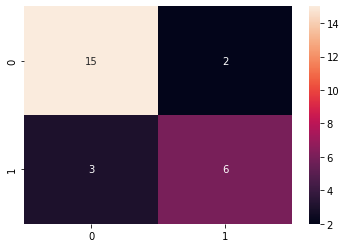

In [169]:
ypred = bst.predict(X_test)
y_pred = model.predict(X_test).round()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

print(classification_report(y_test,y_pred))

<AxesSubplot:ylabel='Feature'>

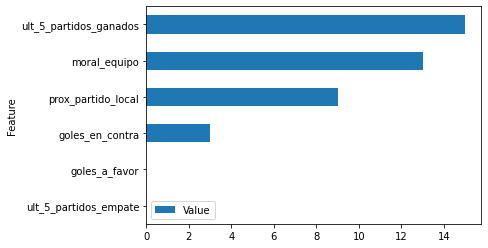

In [145]:
features = X_train.columns
df_plot=pd.DataFrame({'Feature':features,'Value':bst.feature_importance()}).sort_values(by="Value",ascending=True)
df_plot.plot.barh(y='Value',x='Feature')

# Adaboost

In [77]:
from sklearn.ensemble import AdaBoostClassifier

0.7755102040816326
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.67      0.22      0.33         9

    accuracy                           0.69        26
   macro avg       0.68      0.58      0.57        26
weighted avg       0.69      0.69      0.64        26



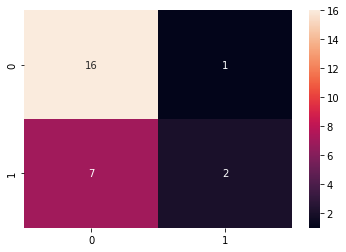

In [172]:
clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=40, random_state=0)
clf.fit(X_train, y_train)

print(clf.score(X_train,y_train))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

Text(0.5, 1.0, 'Feature Importance')

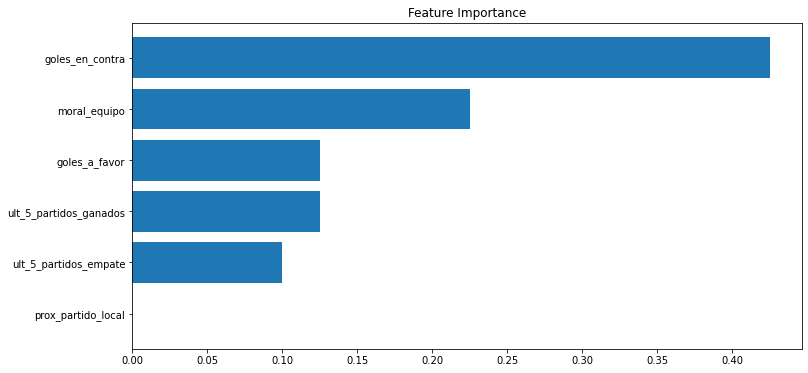

In [173]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')